In [1]:
import pandas as pd
from src.polaris import Polaris
from src.data import PolarisDataset
from src.utils import scaffold_split
from pathlib import Path
import seaborn as sns
import polaris as po
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# set seaborn theme
sns.set_theme()

# Data Evaluation

## Potency

### Datasets

Show label distribution for Train Polaris, Train Scaffold, Test Scaffold
Also show number of duplicate entries



In [ ]:
task = 'potency'
target_task = 'pIC50 (MERS-CoV Mpro)'

root = Path("./data") / "polaris" / task
train_polaris = PolarisDataset(root=root, task=task, target_task=target_task, train=True)
test_polaris = PolarisDataset(root=root, task=task, target_task=target_task, train=False)
train_scaffold, test_scaffold = scaffold_split(dataset=train_polaris, test_size=0.1)

In [ ]:
train_plot = sns.displot(data=train_polaris.y, kde=True, legend=False)
train_plot.set_xlabels(target_task)
plt.title("Train Polaris")
sns.displot(data=train_scaffold.y, kde=True, legend=False).set_xlabels(target_task)
plt.title("Train Scaffold")
sns.displot(data=test_scaffold.y, kde=True, legend=False).set_xlabels(target_task)
plt.title("Test Scaffold")

### Inference

In [ ]:
# Get EHIMP Results
df_potency_ehimp2 = pd.read_csv("./results/2025-04-05/potency_ehimp_results_2.csv")
df_potency_ehimp3 = pd.read_csv("./results/2025-04-05/potency_ehimp_results_3.csv")
df_potency_ehimp5 = pd.read_csv("./results/2025-04-05/potency_ehimp_results_5.csv")

df_potency_ehimp = pd.concat([df_potency_ehimp2, df_potency_ehimp3, df_potency_ehimp5]).reset_index(drop=True)

In [5]:
# Combine results of gnn and ecfp
df_potency_gnn = pd.read_csv("./results/potency_gnn_results.csv")
df_potency_ecfp = pd.read_csv("./results/potency_ecfp_results.csv")
df_potency = pd.concat([df_potency_gnn, df_potency_ecfp, df_potency_ehimp]).reset_index(drop=True)
df_potency = df_potency.convert_dtypes()
df_potency

,task,target_task,batch_size,epochs,lr,weight_decay,num_cv_folds,num_cv_bins,scaffold_split_val_sz,encoding_dim,...,out_dim,mean_val_loss,patience,final_avg_epochs,mae_test_scaffold,radius,use_erg,use_ft,ft_resolution,rg_embedding_dim
0,potency,pIC50 (MERS-CoV Mpro),8,500,0.0001,0.0,5,10,0.1,8,...,1,0.687759,5,13,0.854941,<NA>,<NA>,<NA>,<NA>,<NA>
1,potency,pIC50 (MERS-CoV Mpro),8,500,0.0001,0.0,5,10,0.1,8,...,1,0.640967,5,16,0.823362,<NA>,<NA>,<NA>,<NA>,<NA>
2,potency,pIC50 (MERS-CoV Mpro),8,500,0.0001,0.0,5,10,0.1,8,...,1,0.673833,5,15,0.862108,<NA>,<NA>,<NA>,<NA>,<NA>
3,potency,pIC50 (MERS-CoV Mpro),8,500,0.0001,0.0,5,10,0.1,8,...,1,0.66107,5,15,0.834215,<NA>,<NA>,<NA>,<NA>,<NA>
4,potency,pIC50 (MERS-CoV Mpro),8,500,0.0001,0.0,5,10,0.1,8,...,1,0.632096,5,20,0.827198,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10515,potency,pIC50 (SARS-CoV-2 Mpro),32,500,0.001,0.0001,5,10,0.1,<NA>,...,1,0.560019,5,15,0.51754,<NA>,True,True,5,16
10516,potency,pIC50 (SARS-CoV-2 Mpro),32,500,0.001,0.0001,5,10,0.1,<NA>,...,1,0.582022,5,13,0.641914,<NA>,True,True,5,16
10517,potency,pIC50 (SARS-CoV-2 Mpro),32,500,0.001,0.0001,5,10,0.1,<NA>,...,1,0.581854,5,13,0.472651,<NA>,True,True,5,16
10518,potency,pIC50 (SARS-CoV-2 Mpro),32,500,0.001,0.0001,5,10,0.1,<NA>,...,1,0.584921,5,13,0.413992,<NA>,True,True,5,16


In [9]:
# Group by target_task and find the row with minimum mean_val_loss for each group
df_best_potency = df_potency.loc[df_potency.groupby(['target_task', 'repr_model'])['mae_test_scaffold'].idxmin()].reset_index(drop=True)

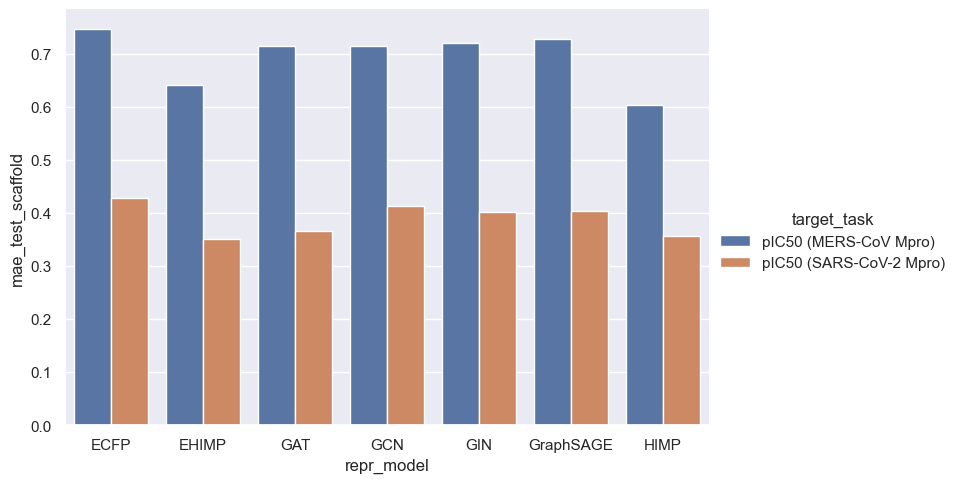

In [7]:
df_best_potency_hist = df_best_potency[["target_task", "repr_model", "mae_test_scaffold"]]
g_potency = sns.catplot(
    data=df_best_potency_hist,
    kind="bar",
    x="repr_model",
    y="mae_test_scaffold",
    hue="target_task",
    aspect=1.5,
)

### Analysis

In [ ]:
# Plot y_true, y_pred for best performing model (maybe even in plotly?)

### Submission

In [ ]:
# Pick best model for each task
idx = df_best_potency.groupby("target_task")['mae_test_scaffold'].idxmin().tolist()
potency_submission_models_list = df_best_potency.iloc[idx].to_dict("records")

y_pred = {}
for model in potency_submission_models_list:
	target_task = model["target_task"]
	polaris = Polaris(model)
	polaris.train_final(polaris.train_polaris)
	preds = polaris.predict(polaris.test_polaris)
	y_pred[target_task] = preds

y_submission = {}
for k, v in y_pred.items():
	y_submission[k] = [tup[1] for tup in v]

sns.displot(y_submission)

In [ ]:
# Submit results
competition = po.load_competition("asap-discovery/antiviral-potency-2025")

competition.submit_predictions(
    predictions = y_submission,
    prediction_name = "test_2",
    prediction_owner = "aehrlich",
    report_url = "https://www.example.com",
    description = "Second submission"
)

## Admet

### Datasets

In [ ]:
task = 'admet'
target_task = 'MDR1-MDCKII'

root = Path("./data") / "polaris" / task
train_polaris = PolarisDataset(root=root, task=task, target_task=target_task, train=True)
test_polaris = PolarisDataset(root=root, task=task, target_task=target_task, train=False)
train_scaffold, test_scaffold = scaffold_split(dataset=train_polaris, test_size=0.1)

In [ ]:
sns.displot(data=train_polaris.y, kde=True, legend=False).set_xlabels(target_task)
sns.displot(data=train_scaffold.y, kde=True, legend=False).set_xlabels(target_task)
sns.displot(data=test_scaffold.y, kde=True, legend=False).set_xlabels(target_task)

### Inference

In [7]:
# Get EHIMP Results
df_admet_ehimp2 = pd.read_csv("./results/2025-04-05/admet_ehimp_results_2.csv")

In [12]:
# Combine results of gnn and ecfp
df_admet_gnn = pd.read_csv("./results/admet_gnn_results.csv")
df_admet_ecfp = pd.read_csv("./results/admet_ecfp_results.csv")
df_admet = pd.concat([df_admet_gnn, df_admet_ecfp, df_admet_ehimp2]).reset_index(drop=True)
df_admet = df_admet.convert_dtypes()
df_admet

,task,target_task,batch_size,epochs,lr,weight_decay,num_cv_folds,num_cv_bins,scaffold_split_val_sz,encoding_dim,...,out_dim,mean_val_loss,patience,final_avg_epochs,mae_test_scaffold,radius,use_erg,use_ft,ft_resolution,rg_embedding_dim
0,admet,MLM,32,500,0.001,0.0,5,10,0.1,8,...,1,0.497535,5,9,0.768753,<NA>,<NA>,<NA>,<NA>,<NA>
1,admet,MLM,32,500,0.001,0.0,5,10,0.1,8,...,1,0.508677,5,10,0.669117,<NA>,<NA>,<NA>,<NA>,<NA>
2,admet,MLM,32,500,0.001,0.0,5,10,0.1,8,...,1,0.501311,5,8,0.668282,<NA>,<NA>,<NA>,<NA>,<NA>
3,admet,MLM,32,500,0.001,0.0,5,10,0.1,8,...,1,0.503207,5,8,0.769767,<NA>,<NA>,<NA>,<NA>,<NA>
4,admet,MLM,32,500,0.001,0.0,5,10,0.1,8,...,1,0.507653,5,7,0.657329,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,admet,MDR1-MDCKII,32,500,0.0001,0.0001,5,10,0.1,<NA>,...,1,0.315825,5,35,0.296434,<NA>,True,True,2,16
23836,admet,MDR1-MDCKII,32,500,0.0001,0.0001,5,10,0.1,<NA>,...,1,0.365264,5,42,0.325871,<NA>,True,True,2,16
23837,admet,MDR1-MDCKII,32,500,0.0001,0.0001,5,10,0.1,<NA>,...,1,0.376765,5,53,0.354733,<NA>,True,True,2,16
23838,admet,MDR1-MDCKII,32,500,0.0001,0.0001,5,10,0.1,<NA>,...,1,0.375157,5,43,0.38302,<NA>,True,True,2,16


In [13]:
# Group by target_task and find the row with minimum mean_val_loss for each group
df_best_admet = df_admet.loc[df_admet.groupby(['target_task', 'repr_model'])['mae_test_scaffold'].idxmin()].reset_index(drop=True)
df_best_admet

,task,target_task,batch_size,epochs,lr,weight_decay,num_cv_folds,num_cv_bins,scaffold_split_val_sz,encoding_dim,...,out_dim,mean_val_loss,patience,final_avg_epochs,mae_test_scaffold,radius,use_erg,use_ft,ft_resolution,rg_embedding_dim
0,admet,HLM,16,500,0.001,0.0,5,10,0.1,<NA>,...,1,0.342203,5,10,0.434093,3,<NA>,<NA>,<NA>,<NA>
1,admet,HLM,16,500,0.0001,0.0001,5,10,0.1,<NA>,...,1,0.405327,5,43,0.564406,<NA>,True,True,2,16
2,admet,HLM,32,500,0.001,0.0001,5,10,0.1,64,...,1,0.441509,5,11,0.554276,<NA>,<NA>,<NA>,<NA>,<NA>
3,admet,HLM,32,500,0.001,0.01,5,10,0.1,64,...,1,0.403393,5,18,0.560415,<NA>,<NA>,<NA>,<NA>,<NA>
4,admet,HLM,64,500,0.001,0.0,5,10,0.1,16,...,1,0.402955,5,21,0.556105,<NA>,<NA>,<NA>,<NA>,<NA>
5,admet,HLM,32,500,0.001,0.0,5,10,0.1,16,...,1,0.39009,5,20,0.554265,<NA>,<NA>,<NA>,<NA>,<NA>
6,admet,HLM,32,500,0.001,0.0,5,10,0.1,8,...,1,0.375675,5,13,0.498169,<NA>,<NA>,<NA>,<NA>,<NA>
7,admet,KSOL,16,500,0.0001,0.0001,5,10,0.1,<NA>,...,1,0.325908,5,48,0.369761,2,<NA>,<NA>,<NA>,<NA>
8,admet,KSOL,8,500,0.0001,0.0,5,10,0.1,<NA>,...,1,0.351345,5,27,0.293703,<NA>,True,True,2,16
9,admet,KSOL,32,500,0.001,0.0001,5,10,0.1,16,...,1,0.472211,5,20,0.422752,<NA>,<NA>,<NA>,<NA>,<NA>


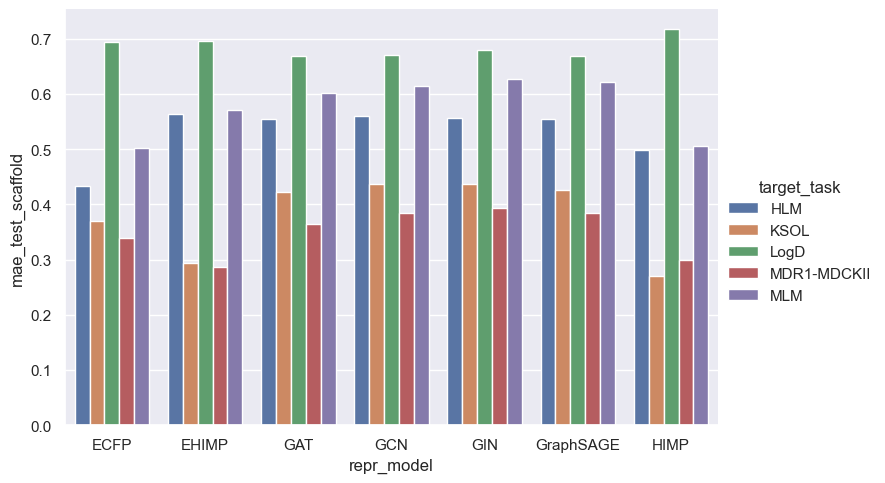

In [14]:
# Create a histogram of MAE for each target_task and model
df_best_admet_hist = df_best_admet[["target_task", "repr_model", "mae_test_scaffold"]]
g_admet = sns.catplot(
    data=df_best_admet_hist,
    kind="bar",
    x="repr_model",
    y="mae_test_scaffold",
    hue="target_task",
    aspect=1.5,
)

### Submission

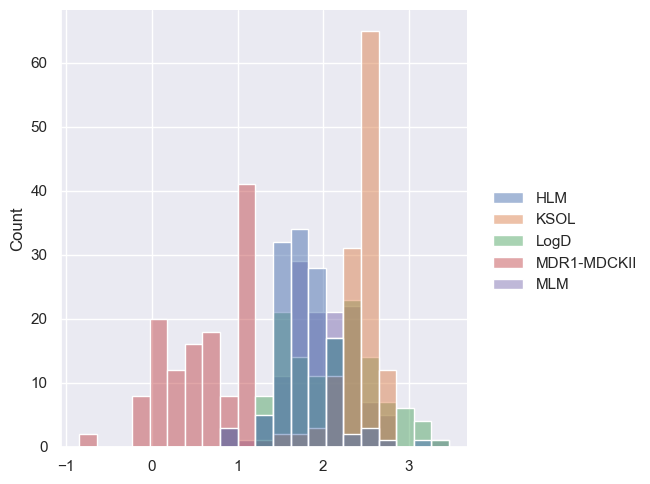

In [15]:
# Extract the best MAE for each target_task
idx = df_best_admet.groupby("target_task")['mae_test_scaffold'].idxmin().tolist()
admet_submission_models_list = df_best_admet.iloc[idx].to_dict("records")

y_pred = {}
for model in admet_submission_models_list:
	target_task = model["target_task"]
	polaris = Polaris(model)
	polaris.train_final(polaris.train_polaris)
	preds = polaris.predict(polaris.test_polaris)
	y_pred[target_task] = preds

y_submission_admet = {}
for k, v in y_pred.items():
	y_submission_admet[k] = [tup[1] for tup in v]

sns.displot(y_submission_admet)

In [ ]:
competition = po.load_competition("asap-discovery/antiviral-admet-2025")

competition.submit_predictions(
    predictions = y_submission_admet,
    prediction_name = "cv-5",
    prediction_owner = "aehrlich",
    report_url = "https://www.example.com",
    description = "Second submission"
)

[2025-03-09 17:05:03] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=27232;file:///opt/homebrew/Caskroom/miniconda/base/envs/polaris/lib/python3.12/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=220761;file:///opt/homebrew/Caskroom/miniconda/base/envs/polaris/lib/python3.12/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.7).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=831690;file:///opt/homebrew/Caskroom/miniconda/base/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=882280;file:///opt/homebrew/Caskroom/miniconda/base/envs/polaris/lib/python3.12/site-packages/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

Output()

[17:05:04]  Success: Submitting competition predictions                                               ]8;id=213451;file:///opt/homebrew/Caskroom/miniconda/base/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=776722;file:///opt/homebrew/Caskroom/miniconda/base/envs/polaris/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\